In [1]:
import math
from simtk import unit
from openmmtools import testsystems, states, mcmc, multistate
import os
import tempfile
import pickle
from perses.annihilation.lambda_protocol import RelativeAlchemicalState
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
from matplotlib import pyplot as plt

DEBUG:matplotlib:$HOME=/home/zhangi
DEBUG:matplotlib:CONFIGDIR=/home/zhangi/.config/matplotlib
DEBUG:matplotlib:matplotlib data path: /home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:loaded rc file /home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
DEBUG:matplotlib:matplotlib version 3.1.1
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_

DEBUG:matplotlib:CACHEDIR=/home/zhangi/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/zhangi/.cache/matplotlib/fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# Load pickle
htf = pickle.load(open("/data/chodera/zhangi/perses_benchmark/neq/7/10/10_vacuum.pickle", "rb" ))

In [108]:
# Save pdb of neq positions/topology
import mdtraj as md
traj = md.Trajectory(np.array(htf.new_positions(htf.hybrid_positions)), md.Topology.from_openmm(htf._topology_proposal.new_topology))
traj.save("tyr.pdb")

### NEW cache

In [3]:
# Set variables to help determine which files to load
i = 10
aa = 'tyr'
length = '5ns'
out_dir = f"/data/chodera/zhangi/perses_benchmark/neq/7/{i}/"

In [4]:
# Get new topology so we can get the number of atoms in it
new_top = md.Topology.from_openmm(htf._topology_proposal.new_topology)

In [5]:
new_top.n_atoms

33

In [6]:
# From Hannah: https://github.com/hannahbrucemacdonald/endstate_pdbs/blob/master/scripts/input_for_pol_calc.py
from perses.analysis.utils import open_netcdf
nc = open_netcdf(os.path.join(out_dir, f"{i}_vacuum_{aa}_{length}.nc"))
nc_checkpoint = open_netcdf(os.path.join(out_dir, f"{i}_vacuum_{aa}_{length}_checkpoint.nc"))
checkpoint_interval = nc_checkpoint.CheckpointInterval
all_positions = nc_checkpoint.variables['positions']
n_iter, n_replicas, n_atoms, _ = np.shape(all_positions)

In [7]:
n_atoms

34

In [8]:
# Load hybrid and new positions
from tqdm import tqdm
index = 0 # of replica
all_pos = np.zeros(shape=(n_iter, new_top.n_atoms, 3))
all_pos_hybrid = np.zeros(shape=(n_iter, n_atoms, 3))
for iteration in tqdm(range(n_iter)):
    replica_id = np.where(nc.variables['states'][iteration*checkpoint_interval] == index)[0]
    pos = all_positions[iteration,replica_id,:,:][0] *unit.nanometers
    all_pos[iteration] = htf.new_positions(pos).value_in_unit_system(unit.md_unit_system) # Get new positions only
    all_pos_hybrid[iteration] = pos.value_in_unit_system(unit.md_unit_system) # Get new positions only


100%|██████████| 5001/5001 [00:17<00:00, 278.58it/s]


In [9]:
np.array(all_pos).shape

(5001, 33, 3)

In [10]:
# Load positions are trajectory
traj = md.Trajectory(np.array(all_pos), new_top)

In [11]:
# Determine which atom indices we want to define the dihedral with
for atom in traj.topology.atoms:
    print(atom, atom.index)

ACE1-H1 0
ACE1-CH3 1
ACE1-H2 2
ACE1-H3 3
ACE1-C 4
ACE1-O 5
TYR2-N 6
TYR2-H 7
TYR2-CA 8
TYR2-HA 9
TYR2-CB 10
TYR2-HB2 11
TYR2-HB3 12
TYR2-C 13
TYR2-O 14
TYR2-CG 15
TYR2-CD1 16
TYR2-HD1 17
TYR2-CE1 18
TYR2-HE1 19
TYR2-CZ 20
TYR2-OH 21
TYR2-HH 22
TYR2-CE2 23
TYR2-HE2 24
TYR2-CD2 25
TYR2-HD2 26
NME3-N 27
NME3-H 28
NME3-C 29
NME3-H1 30
NME3-H2 31
NME3-H3 32


In [12]:
# Save traj
traj.save(os.path.join(out_dir, f"{aa}_traj.pdb"))

In [13]:
# Compute dihedral angles 
dihedrals = np.sin(md.compute_dihedrals(traj, np.array([[15, 10, 8, 6]])))

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplo

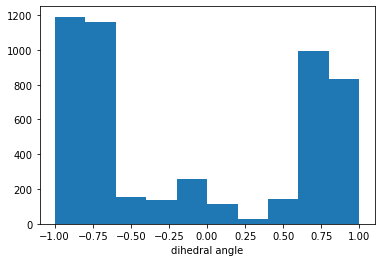

In [14]:
# Plot dihedral angles
plt.hist(dihedrals)
plt.xlabel("dihedral angle")
plt.show()

In [15]:
# Analyze dihedrals for decorrelation
from perses.dispersed import feptasks
t0, g, neff_max, a_t, uncorrelated_indices = feptasks.compute_timeseries(dihedrals)

RDKit WARNING: [12:02:38] Enabling RDKit 2019.09.3 jupyter extensions


In [16]:
t0

3266

In [17]:
uncorrelated_indices

[3266,
 3271,
 3277,
 3282,
 3288,
 3293,
 3299,
 3304,
 3310,
 3315,
 3321,
 3326,
 3332,
 3337,
 3343,
 3348,
 3354,
 3359,
 3365,
 3370,
 3376,
 3381,
 3386,
 3392,
 3397,
 3403,
 3408,
 3414,
 3419,
 3425,
 3430,
 3436,
 3441,
 3447,
 3452,
 3458,
 3463,
 3469,
 3474,
 3480,
 3485,
 3491,
 3496,
 3501,
 3507,
 3512,
 3518,
 3523,
 3529,
 3534,
 3540,
 3545,
 3551,
 3556,
 3562,
 3567,
 3573,
 3578,
 3584,
 3589,
 3595,
 3600,
 3606,
 3611,
 3616,
 3622,
 3627,
 3633,
 3638,
 3644,
 3649,
 3655,
 3660,
 3666,
 3671,
 3677,
 3682,
 3688,
 3693,
 3699,
 3704,
 3710,
 3715,
 3721,
 3726,
 3731,
 3737,
 3742,
 3748,
 3753,
 3759,
 3764,
 3770,
 3775,
 3781,
 3786,
 3792,
 3797,
 3803,
 3808,
 3814,
 3819,
 3825,
 3830,
 3836,
 3841,
 3846,
 3852,
 3857,
 3863,
 3868,
 3874,
 3879,
 3885,
 3890,
 3896,
 3901,
 3907,
 3912,
 3918,
 3923,
 3929,
 3934,
 3940,
 3945,
 3951,
 3956,
 3961,
 3967,
 3972,
 3978,
 3983,
 3989,
 3994,
 4000,
 4005,
 4011,
 4016,
 4022,
 4027,
 4033,
 4038,
 4044,

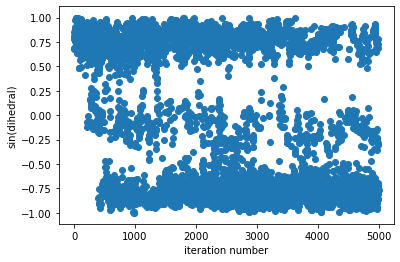

In [18]:
# Plot dihedral trajectory
plt.scatter(range(n_iter), dihedrals)
plt.ylabel("sin(dihedral)")
plt.xlabel("iteration number")
plt.savefig(os.path.join(out_dir, f"{aa}_mixing.png"))
plt.show()

In [19]:
# Get number of decorrelated samples
dihedrals[uncorrelated_indices].shape

(317, 1)

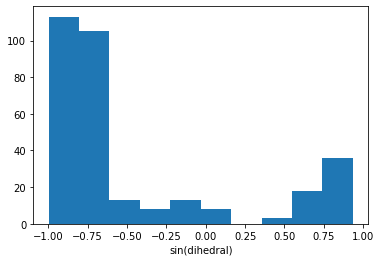

In [21]:
# Plot angles of decorrelated dihedral samples
plt.hist(dihedrals[uncorrelated_indices])
plt.xlabel("sin(dihedral)")
plt.show()

In [22]:
# Choose 200 random decorrelated samples
snapshots = np.random.choice(uncorrelated_indices, size=200, replace=False)

In [24]:
# Save snapshot indices and positions arrays
with open(os.path.join(out_dir, f"{aa}_indices.npy"), 'wb') as f:
    np.save(f, snapshots)
with open(os.path.join(out_dir, f"{aa}_pos_hybrid.npy"), 'wb') as f:
    np.save(f, all_pos_hybrid)

In [15]:
# with open(os.path.join(out_dir, f"ser_pos_hybrid.npy"), 'rb') as f:
#     ser_pos_hybrid = np.load(f)

In [179]:
# with open(os.path.join(out_dir, f"ala_pos_hybrid.npy"), 'rb') as f:
#     ala_pos_hybrid = np.load(f)